In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_insurance=pd.read_csv('SBI_Life_insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

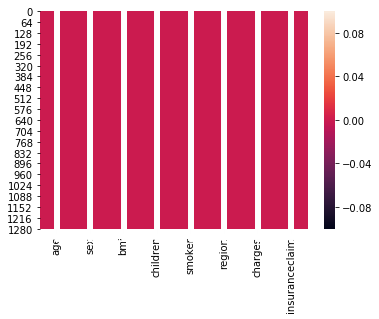

In [5]:
sns.heatmap(df_insurance.isnull(),annot=True)
plt.show()

In [6]:
df_insurance.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
df_insurance.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


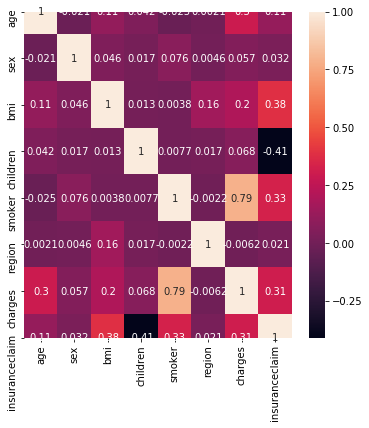

In [9]:
plt.subplots(figsize=(6,6))
sns.heatmap(df_insurance.corr(),annot=True)
plt.show()

In [10]:
df_insurance['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

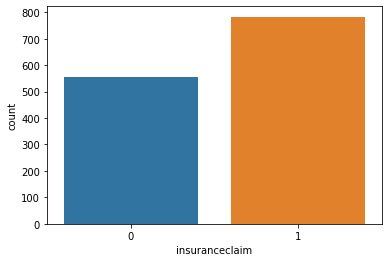

In [11]:
sns.countplot(x="insuranceclaim",data=df_insurance)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022667FB9A48>,
      dtype=object)

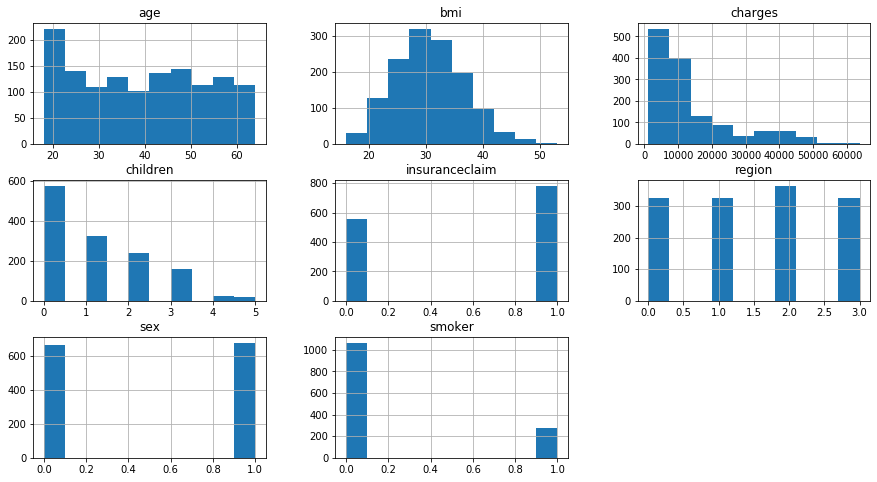

In [12]:
df_insurance.hist(figsize=(15,8))

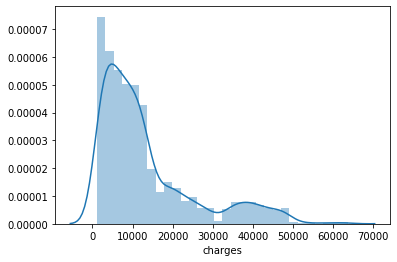

In [13]:
 sns.distplot(df_insurance['charges'])

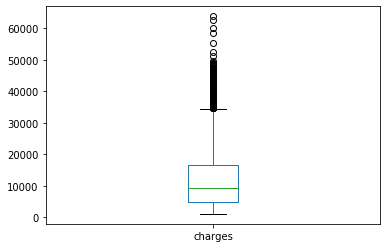

In [14]:
df_insurance['charges'].plot.box()

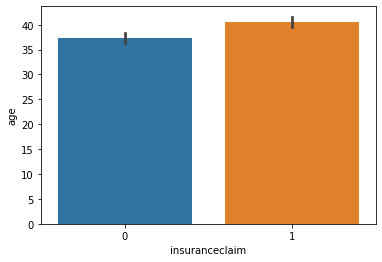

In [15]:
sns.barplot(x='insuranceclaim',y='age',data=df_insurance)

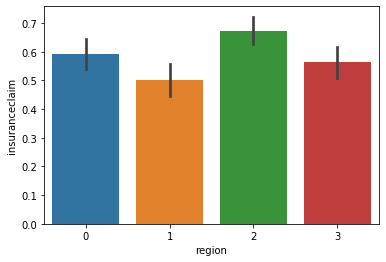

In [16]:
sns.barplot(x="region",y="insuranceclaim",data=df_insurance)
plt.show()

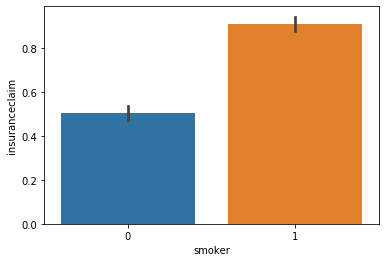

In [17]:
sns.barplot(x="smoker",y="insuranceclaim",data=df_insurance)
plt.show()

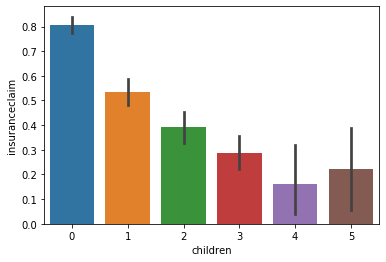

In [18]:
sns.barplot(x="children",y="insuranceclaim",data=df_insurance)
plt.show()

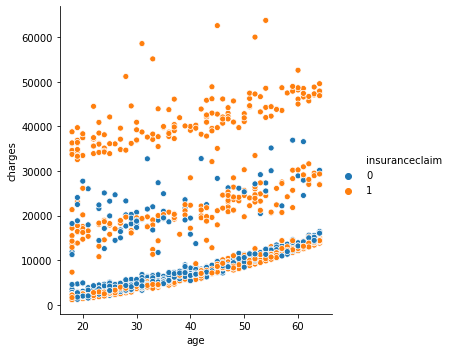

In [19]:
sns.relplot(x='age',y='charges',hue='insuranceclaim',data=df_insurance)
plt.show()

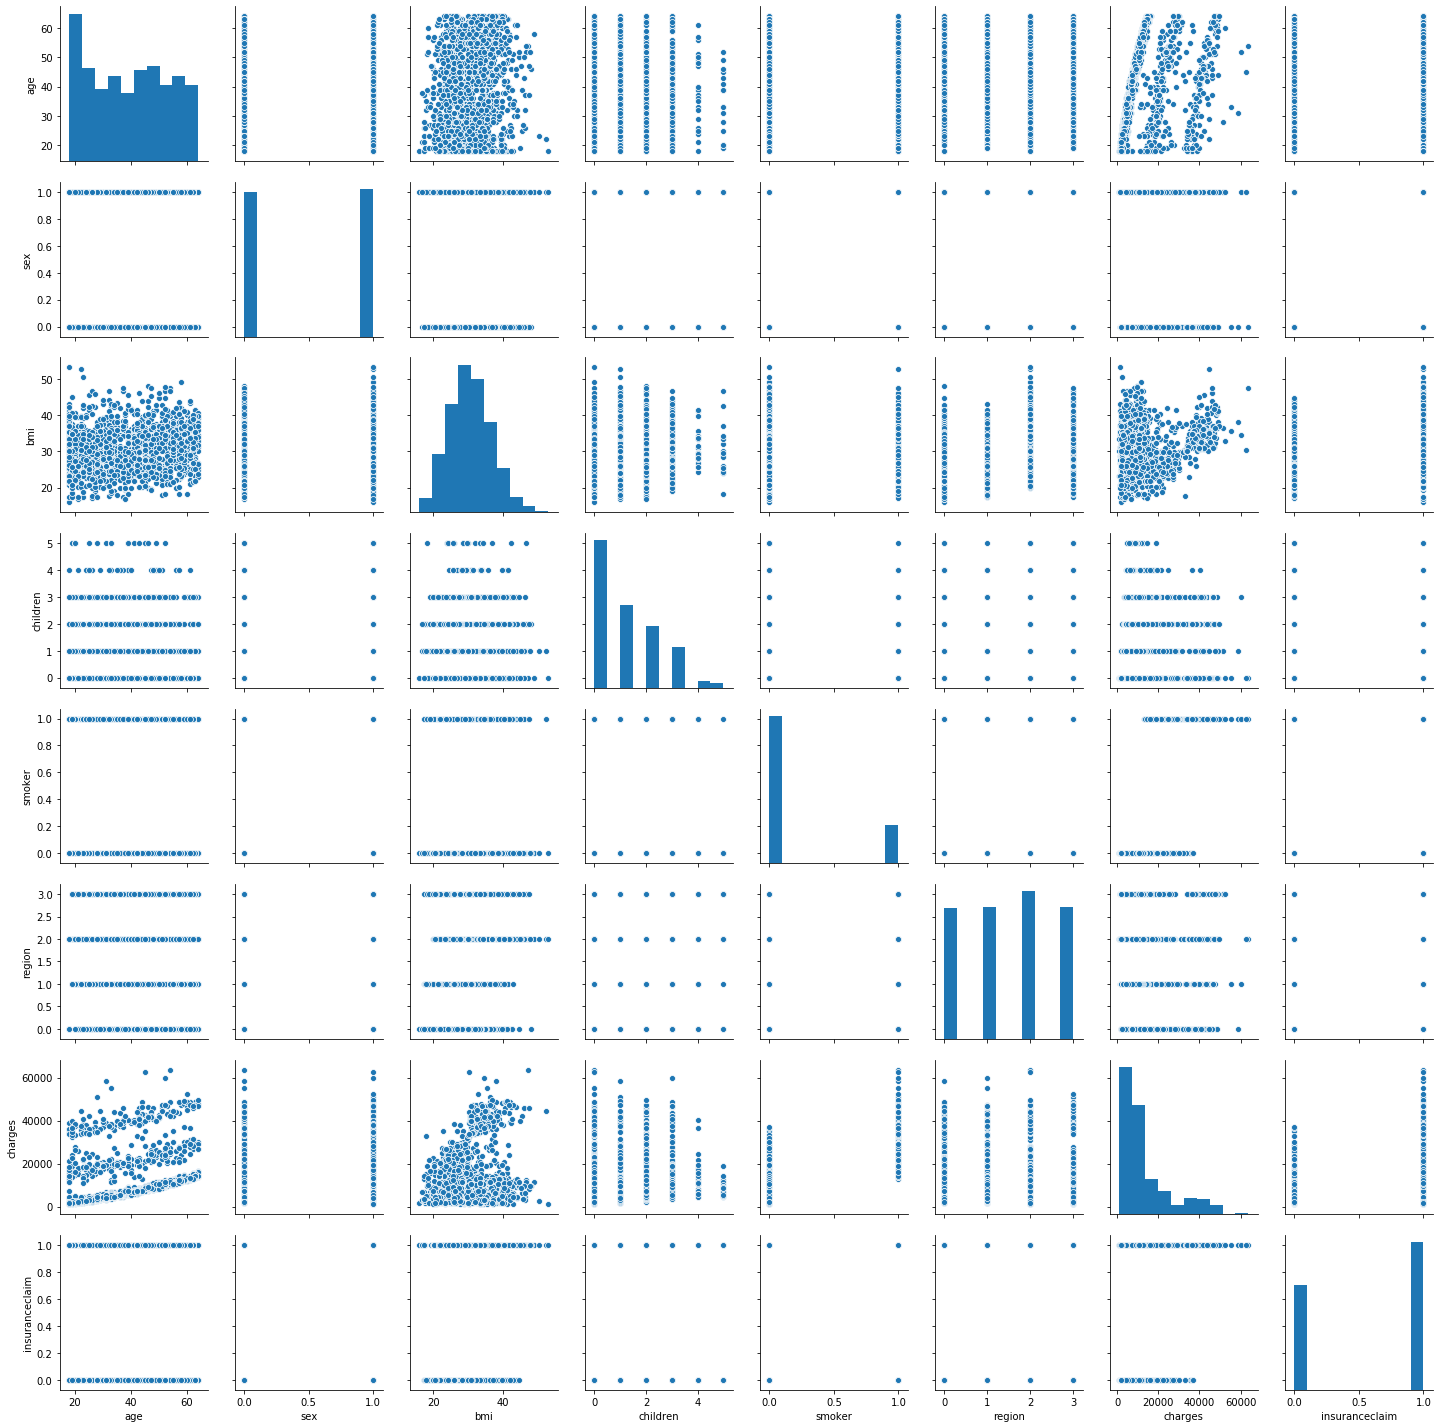

In [20]:
sns.pairplot(df_insurance)
plt.show()

In [21]:
df_insurance.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [22]:
for col in df_insurance.columns:
    if df_insurance.skew().loc[col]>0.55:
        df_insurance[col]=np.log1p(df_insurance[col])

In [23]:
df_insurance.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [24]:
df_x=df_insurance.iloc[:,:-1]
df_y=df_insurance.iloc[:,-1]

In [25]:
df_x.shape

(1338, 7)

In [26]:
df_y.shape

(1338,)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [28]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,df_y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, df_y,random_state = r_state,test_size=0.20,stratify=df_y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
maxf1_score(lg,df_x,df_y)

maximum f1_score is at random state : 60  and it is : 0.9259259259259259


In [30]:
print("Mean f1 score for logistic classifier: ",cross_val_score(lg,df_x,df_y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score for logistic classifier: ",cross_val_score(lg,df_x,df_y,cv=5,scoring="f1").std())
print(cross_val_score(lg,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.8889640074337457
Standard deviation in f1 score for logistic classifier:  0.014432372781905152
[0.87012987 0.90965732 0.89308176 0.89655172 0.87539936]


Random Forest Classifier

In [31]:
parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5,scoring="f1")
clf.fit(df_x,df_y)
clf.best_params_

{'n_estimators': 500}

In [32]:
rf=RandomForestClassifier(n_estimators=500)
maxf1_score(rf,df_x,df_y)

maximum f1_score is at random state : 97  and it is : 0.9808917197452229


In [33]:
print("Mean f1 score for Random Forest classifier: ",cross_val_score(rf,df_x,df_y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for Random Forest classifier: ",cross_val_score(rf,df_x,df_y,cv=5,scoring="f1").std())
print(cross_val_score(rf,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score for Random Forest classifier:  0.9619922035261069
standard deviation in f1 score for Random Forest classifier:  0.01280618460976131
[0.95145631 0.95176849 0.96835443 0.98076923 0.95483871]


Decision Tree Classifier

In [34]:
dtc=DecisionTreeClassifier()
maxf1_score(dtc,df_x,df_y)

maximum f1_score is at random state : 68  and it is : 0.9968253968253968


In [35]:
print("Mean f1 score for Decision Tree classifier: ",cross_val_score(dtc,df_x,df_y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for Decision Tree classifier: ",cross_val_score(dtc,df_x,df_y,cv=5,scoring="f1").std())
print(cross_val_score(dtc,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score for Decision Tree classifier:  0.9829077901456721
standard deviation in f1 score for Decision Tree classifier:  0.007296040545400055
[0.99367089 0.96835443 0.97791798 0.97124601 0.99041534]


KNeighbors Classifier

In [36]:
knn=KNeighborsClassifier()
maxf1_score(knn,df_x,df_y)

maximum f1_score is at random state : 83  and it is : 0.9389067524115756


In [37]:
print("Mean f1 score for KNeighborsClassifier classifier: ",cross_val_score(knn,df_x,df_y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for KNeighborsClassifier classifier: ",cross_val_score(knn,df_x,df_y,cv=5,scoring="f1").std())
print(cross_val_score(knn,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score for KNeighborsClassifier classifier:  0.893410201037361
standard deviation in f1 score for KNeighborsClassifier classifier:  0.010941920403194132
[0.89542484 0.8802589  0.88387097 0.91139241 0.8961039 ]


SVC Classifier

In [38]:
svc=SVC()
maxf1_score(svc,df_x,df_y)

maximum f1_score is at random state : 86  and it is : 0.9539473684210527


In [39]:
print("Mean f1 score for SVC classifier: ",cross_val_score(svc,df_x,df_y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVC classifier: ",cross_val_score(svc,df_x,df_y,cv=5,scoring="f1").std())
print(cross_val_score(svc,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score for SVC classifier:  0.9132118414021612
standard deviation in f1 score for SVC classifier:  0.016705246863965552
[0.8956229  0.90789474 0.91089109 0.94498382 0.90666667]


In [40]:
#Selecting final model as Decision tree since it provides maximum score
x_train,x_test,y_train,y_test=train_test_split(df_x, df_y,random_state = 64,test_size=0.20,stratify=df_y)
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)

In [41]:
print("Confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("\n classification report :\n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix :
 [[110   1]
 [  0 157]]
f1 score is :  0.9968253968253968

 classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

AUC ROC Score:  0.9954954954954954


[0.         0.00900901 1.        ]
[0. 1. 1.]
[2. 1. 0.]


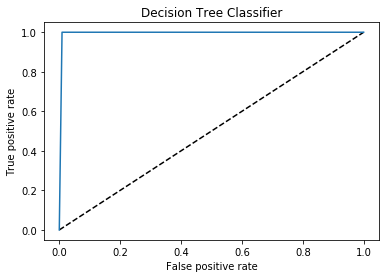

In [42]:
#Plotting AUC-ROC curve
y_pred_prob_dt=dct.predict_proba(x_test)[:,-1]
y_pred_prob_dt
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob_dt)
print(fpr)
print(tpr)
print(thresholds)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Decision Tree Classifier")
plt.show()

In [43]:
models = []
models.append(('SVC', SVC()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=100)))
models.append(('RandomForestClassifier', RandomForestClassifier()))

In [44]:
Model = []
scores = []
f1score =[]
cvs=[]
Precisionscore = []
roc=[]
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    f1score.append(f1_score(y_test,y_pred))
    re = cross_val_score(model, df_x,df_y, cv=5, scoring='accuracy').mean()
    roc.append(roc_auc_score(y_test,y_pred))
    cvs.append(re)
    Model.append(name)
result = pd.DataFrame({'Model': Model, 'Accuracy_score': scores ,'F1_score': f1score,'Cross_val_score':cvs,'Roc_auc_score':roc})
result

,Model,Accuracy_score,F1_score,Cross_val_score,Roc_auc_score
0,SVC,0.914179,0.924092,0.902113,0.918833
1,KNeighborsClassifier,0.880597,0.901840,0.876698,0.869054
2,LogisticRegression,0.876866,0.895238,0.869202,0.872468
3,DecisionTreeClassifier,0.996269,0.996825,0.975334,0.995495
4,RandomForestClassifier,0.936567,0.945338,0.935748,0.936621


In [45]:
#Saving the model
from sklearn.externals import joblib 
joblib.dump(dct, 'Model_SBI_insurance.pkl')

['Model_SBI_insurance.pkl']